In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.lib.shape_base import expand_dims

# De Jong's test suite

These functions represent the common difficulties in optimization problems in an isolated manner.By running the comparisons on the De Jong's test suite, one can make judgments about the strengths and weaknesses of particular algorithms. Also, De Jong's functions are quite popular in nonlinear optimization literature, so it is possible to make direct comparisons between several methods.

## De Jong function n. 2

Also known as **Rosenbrock** function, it is a nightmare since it has a very narrow ridge. The tip of the ridge is very sharp, and it runs around a parabola. Algorithms that are not able to discover good directions underperform in this problem.

The function can be evaluated in any $N$ dimensional space, with $N \in \mathbb{N}$. The domain $\mathbb{R}^N$ is bounded by the interval \[-5.12, 5.12\] for each dimension. The global minimum for any $N$ is:
$$\min(DJ_2)= DJ_2(1, ...,1) = 0$$ 

In [2]:
# definition of the De Jong function number 2
def DJ2(x):
  """
  the function takes as input a numpy array x with dimension (n, )
  It returns the evaluation of the De Jong function number 2.
  global minimum DF2(x*)=0
  global arg-minimum x*(i)=1,   i=1:n  
  """
  r = 0
  for i in range(x.shape[0] -1):
    r += 100 * (x[i + 1] - x[i]**2)**2 + (x[i] - 1)**2
  return r

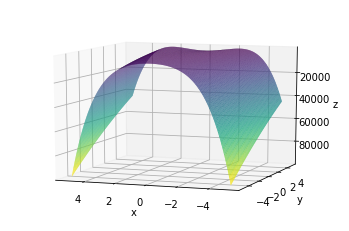

In [3]:
# 3D-plot of the De Jong function in a two dimensional space, recall that DF2 can be evaluated in any dimension N
x = np.linspace(-5.12, 5.12, 100) # it creates an array with 100 items equally spaced between -2.048, 2.048
y = np.linspace(-5.12, 5.12, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item in a grid

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ2, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ2

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(190, 70);

## De Jong function n. 3

Also known as the **step** function is the representative of the problems with flat surfaces. Flat surfaces are obstacles for optimization algorithms, because they do not give any information as to which direction is favorable. Unless an algorithm has variable step sizes, it can get stuck on one of the flat plateaus.

The function can be evaluated in any $N$ dimensional space, with $N \in \mathbb{N}$. The domain $\mathbb{R}^N$ is bounded by the interval \[-5.12, 5.12\] for each dimension. The global minimum for any $N$ is:
$$\min(DJ_3)= DJ_3([-5.12, -5), ...,[-5.12, -5)) = 0$$ 

where $[-5.12, -5)$ is the interval between -5.12 and -5. Therefore the **step** function has a global arg-minimum that is a flat surface.

In [4]:
# definition of the De Jong function number 3
def DJ3(x):
  """
  the function takes as input a numpy array x with dimension (n, )
  It returns the evaluation of the De Jong function number 3.
  global minimum DJ3(x*)=0
  global arg-minimum x*(i)=[-5.12, -5),   i=1:n
  """
  return 6*len(x) + np.sum(np.ceil(x))

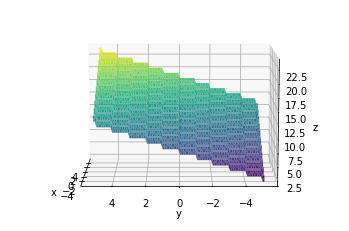

In [5]:
# 3D-plot of the De Jong function in a two dimensional space, recall that DF3 can be evaluated in any dimension N
x = np.linspace(-5.12, 5.12, 100) # it creates an array with 100 items equally spaced between -2.048, 2.048
y = np.linspace(-5.12, 5.12, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item in a grid

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ3, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ3

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 180);

## De Jong function n. 5 
FOXHOLES is an example of many (in this case 25) local optima. Many standard optimization algorithms get stuck in the first peak they find.

The function can be evaluated in just a $2$ dimensional space. The domain $\mathbb{R}^2$ is bounded by the interval \[-65.536, 65.536\] for each dimension. The global minimum is:
$$\min(DJ_5)= DJ_5(-32, -32) = 1$$ 

In [6]:
# definition of the De Jong function number 5

# matrix a creation
a_up = np.tile([-32, -16, 0, 16, 32], 5)
a_down = np.transpose(np.tile([-32, -16, 0, 16, 32], (5, 1))).flatten()
a = np.stack([a_up, a_down])


def DJ5(x):
  """
  the function takes as input a numpy array x with dimension (2, )
  It returns the evaluation of the De Jong function number 5.   
  global minimum DJ5(x*)=1
  global arg-minimum x*(0)=-32, x*(1)=-32  
  """
  d = 0.002
  for i in range(25):
    d += 1 / (i + 1 + (x[0] - a[0][i]) ** 6 + (x[1] - a[1][i]) ** 6)
  return 1 / d

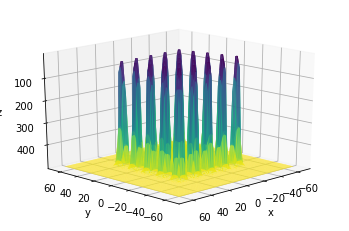

In [7]:
# 3D-plot of the De Jong function in a two dimensional space
x = np.linspace(-65.536, 65.536, 100)
y = np.linspace(-65.536, 65.536, 100)
X, Y = np.meshgrid(x, y)

data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ5, 1, data).reshape(100, 100)

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-160, 135);

# Heuristics

## Coordinate Descent

In [8]:
from time import time
import pandas as pd
from IPython.display import HTML
from scipy.optimize import minimize_scalar, OptimizeResult


def coordinate_descent(fun, initial_guess, bounds, 
                       max_iter = 10000, tolerance=1e-9):
  dimension = len(initial_guess)
  iterations= 0
  i = 0
  res = OptimizeResult()

  def coord(coord, starting_point):
    def sub(x):
      point_ = np.copy(starting_point)
      point_[coord] = x
      return point_
    return lambda x: fun(sub(x))

  nfev = 0
  starting_point = np.array([np.round(np.random.uniform(low=bnds[0], high=bnds[1]), 3) for _ in range(dimension)])
  while np.linalg.norm(fun(starting_point) - fun(initial_guess)) > tolerance and iterations < max_iter:
    for i in range(dimension):
      starting_point = np.copy(initial_guess)
      res = minimize_scalar(coord(i, starting_point), bounds=bnds, method='bounded')
      nfev += res.nfev
      initial_guess = np.copy(starting_point)
      initial_guess[i] = res.x
    iterations += 1
    
  res.nit = iterations
  res.nfev = nfev 
  res.x = initial_guess
  res.fun = fun(initial_guess)
  if iterations < max_iter:
    res.success = True
  return res

In [9]:
dimension = 2
fun = DJ2
real_opt = 0
tolerance = 1e-9
bnds = (-5.12, 5.12)
initial_guess = np.array([np.round(np.random.uniform(low=bnds[0], high=bnds[1]), 3) for _ in range(dimension)])

res = coordinate_descent(fun, initial_guess, bounds=bnds, tolerance=tolerance)
print(res)

     fun: 9.933196674650734e-07
 message: 'Solution found.'
    nfev: 42269
     nit: 2311
  status: 0
 success: True
       x: array([0.99900335, 0.99800768])


In [10]:
# let's make some statistics

data_experiments = {"dimension": [2, 3, 4, 5],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  for _ in range(10):
    initial_guess = np.array([np.round(np.random.uniform(low=bnds[0], high=bnds[1]), 3) for _ in range(dimension)])
    res = coordinate_descent(fun, initial_guess, bounds=bnds, tolerance=tolerance)
    avg_fun.append(res.fun)
    avg_nfev.append(res.nfev)
    avg_it.append(res.nit)
    if res.success:
      if np.abs(res.fun - real_opt) < 1e-6:
        succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  135.46


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,8.996759e-07,2.840331e-07,10/10,40367.5,4077.010774,2215.7
3,5.899761e-07,1.524957e-07,10/10,71481.0,6600.255116,2384.6
4,5.635319e-07,7.403634e-10,10/10,100382.6,8399.480129,2401.3
5,3.444399e-01,1.033319e+00,9/10,107302.8,43583.483339,2026.7


In [11]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5

##Nelder-Mead

In [12]:
from time import time
import pandas as pd
from IPython.display import HTML
from scipy.optimize import minimize


dimension = 2
fun = DJ2
real_opt = 0
tolerance = 1e-9
bnds = (-2.048, 2.048)
initial_guess = np.array([np.round(np.random.uniform(low=bnds[0], high=bnds[1]), 3) for _ in range(dimension)])

res = minimize(fun, initial_guess, method='Nelder-Mead', tol=1e-6)
print(res)

 final_simplex: (array([[0.9999999 , 0.99999979],
       [1.00000021, 1.00000041],
       [1.00000028, 1.00000052]]), array([1.05237731e-14, 4.30628271e-14, 1.69489189e-13]))
           fun: 1.0523773104448945e-14
       message: 'Optimization terminated successfully.'
          nfev: 204
           nit: 112
        status: 0
       success: True
             x: array([0.9999999 , 0.99999979])


In [13]:
# let's make some statistics

data_experiments = {"dimension": [2, 3, 4, 5, 6, 7, 8, 9,10],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  for _ in range(10):
    initial_guess = np.array([np.round(np.random.uniform(low=bnds[0], high=bnds[1]), 3) for _ in range(dimension)])
    res = minimize(fun, initial_guess, method='Nelder-Mead', tol=1e-6)
    avg_fun.append(res.fun)
    avg_nfev.append(res.nfev)
    avg_it.append(res.nit)
    if res.success:
      if np.abs(res.fun - real_opt) < 1e-6:
        succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  3.41


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,3.015394e-14,1.701998e-14,10/10,178.0,30.026655,94.3
3,1.157501e-13,8.033315e-14,10/10,345.9,72.089458,195.0
4,7.402857e-01,1.480571e+00,8/10,554.5,94.789504,329.2
5,1.179260e+00,1.801332e+00,4/10,853.6,114.140440,531.7
6,1.793493e+00,1.799354e+00,0/10,1160.0,80.820789,754.3
7,1.668671e+00,2.029162e+00,0/10,1400.1,0.300000,946.9
8,8.118937e+00,1.447538e+01,0/10,1600.2,0.400000,1111.9
9,3.970851e+00,3.728529e+00,0/10,1800.4,0.489898,1267.3
10,4.072948e+01,6.834576e+01,0/10,2000.2,0.400000,1432.4


In [14]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5